## LAB 6
## CS22B2020
## G.SriRam

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Function to check if the covariance matrix falls under Case 1
def isCase1(mat):
    first = mat[0][0]
    for i in range(1, len(mat)):
        if mat[i][i] != first:
            return False
    return True

# Function to compute the discriminant function for Case 1
def linear_case1(w, pw, cov_mat):
    u1 = np.mean(w, axis=0)  # Compute the mean of the data points
    cov = cov_mat[0][0]  # Extract the covariance value
    weight = u1 / cov  # Compute the weight vector
    bias = np.log(pw) - 0.5 * np.dot(u1.T, u1) / (cov ** 2)  # Compute the bias term
    return weight, bias

# Function to compute the discriminant function for Case 2
def linear_case2(w, pw, cov_mat):
    u1 = np.mean(w, axis=0)  # Compute the mean of the data points
    inv_cov = np.linalg.inv(cov_mat)  # Compute the inverse of the covariance matrix
    weight = inv_cov @ u1  # Compute the weight vector
    bias = np.log(pw) - 0.5 * u1.T @ inv_cov @ u1  # Compute the bias term
    return weight, bias

# Function to compute the discriminant function for Case 3 (non-linear)
def non_linear(w, pw, cov_mat):
    u1 = np.mean(w, axis=0)  # Compute the mean of the data points
    inv_cov = np.linalg.inv(cov_mat)  # Compute the inverse of the covariance matrix
    weight1 = -0.5 * inv_cov  # Compute the quadratic term weight matrix
    weight2 = inv_cov @ u1  # Compute the linear term weight vector
    bias = np.log(pw) - 0.5 * np.log(np.linalg.det(cov_mat)) - 0.5 * u1.T @ inv_cov @ u1  # Compute the bias term
    return weight1, weight2, bias

# Function to classify the data points using Bayes classifier and determine the decision boundary
def bayes_classifier(w1, w2, pw1, pw2):
    w1_cov = np.cov(w1, rowvar=False)  # Compute the covariance matrix for class ω1
    w2_cov = np.cov(w2, rowvar=False)  # Compute the covariance matrix for class ω2

    # Check if the covariance matrices are equal (Case 2)
    if np.allclose(w1_cov, w2_cov):
        weight1, bias1 = linear_case2(w1, pw1, w1_cov)
        weight2, bias2 = linear_case2(w2, pw2, w2_cov)
        w = weight1 - weight2  # Compute the weight difference
        b = bias1 - bias2  # Compute the bias difference
        x_min = min(np.min(w1[:, 0]), np.min(w2[:, 0])) - 1  # Determine the minimum x value for plotting
        x_max = max(np.max(w1[:, 0]), np.max(w2[:, 0])) + 1  # Determine the maximum x value for plotting
        x_values = np.linspace(x_min, x_max, 100)  # Generate x values for plotting
        y_values = -(w[0] * x_values + b) / w[1]  # Compute the corresponding y values for the decision boundary
        return x_values, y_values

    # Check if the covariance matrices fall under Case 1
    elif isCase1(w1_cov) and isCase1(w2_cov):
        weight1, bias1 = linear_case1(w1, pw1, w1_cov)
        weight2, bias2 = linear_case1(w2, pw2, w2_cov)
        w = weight1 - weight2  # Compute the weight difference
        b = bias1 - bias2  # Compute the bias difference
        x_min = min(np.min(w1[:, 0]), np.min(w2[:, 0])) - 1  # Determine the minimum x value for plotting
        x_max = max(np.max(w1[:, 0]), np.max(w2[:, 0])) + 1  # Determine the maximum x value for plotting
        x_values = np.linspace(x_min, x_max, 100)  # Generate x values for plotting
        y_values = -(w[0] * x_values + b) / w[1]  # Compute the corresponding y values for the decision boundary
        return x_values, y_values

    # If the covariance matrices fall under Case 3 (non-linear)
    else:
        weight1_1, weight1_2, bias1 = non_linear(w1, pw1, w1_cov)
        weight2_1, weight2_2, bias2 = non_linear(w2, pw2, w2_cov)
        x_min, x_max = min(np.min(w1[:, 0]), np.min(w2[:, 0])) - 1, max(np.max(w1[:, 0]), np.max(w2[:, 0])) + 1  # Determine the x range for plotting
        y_min, y_max = min(np.min(w1[:, 1]), np.min(w2[:, 1])) - 1, max(np.max(w1[:, 1]), np.max(w2[:, 1])) + 1  # Determine the y range for plotting
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))  # Create a meshgrid for plotting
        grid_points = np.c_[xx.ravel(), yy.ravel()]  # Flatten the meshgrid points
        g1_values = np.array([point.T @ weight1_1 @ point + weight1_2.T @ point + bias1 for point in grid_points])  # Compute the discriminant function values for class ω1
        g2_values = np.array([point.T @ weight2_1 @ point + weight2_2.T @ point + bias2 for point in grid_points])  # Compute the discriminant function values for class ω2
        g1_values = g1_values.reshape(xx.shape)  # Reshape the discriminant function values to match the meshgrid
        g2_values = g2_values.reshape(xx.shape)  # Reshape the discriminant function values to match the meshgrid
        return xx, yy, g1_values, g2_values

# Function to plot the decision boundary between two classes
def find_boundary(w1, w2, pw1, pw2):
    plt.figure(figsize=(10, 10))
    plt.scatter(w1[:, 0], w1[:, 1], color='blue', label='ω1')  # Plot the data points for class ω1
    plt.scatter(w2[:, 0], w2[:, 1], color='red', label='ω2')  # Plot the data points for class ω2
    result = bayes_classifier(w1, w2, pw1, pw2)  # Get the decision boundary result from the Bayes classifier
    if isinstance(result, tuple) and len(result) == 2:
        x_values, y_values = result
        plt.plot(x_values, y_values, color='green', label='Decision Boundary')  # Plot the decision boundary for linear cases
    else:
        xx, yy, g1_values, g2_values = result
        plt.contour(xx, yy, g1_values - g2_values, levels=[0], colors='green')  # Plot the decision boundary for non-linear case
    plt.title("Decision Boundary between w1 and w2")
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.show()

1.Find and plot the decision boundary between class ω1 and ω2. <br>Assume P(ω1) = P(ω2).<br>
```
ω1 = [1,6; 3,4; 3,8; 5,6]
ω2 = [3,0; 1,-2;3,-4;5,-2]
```



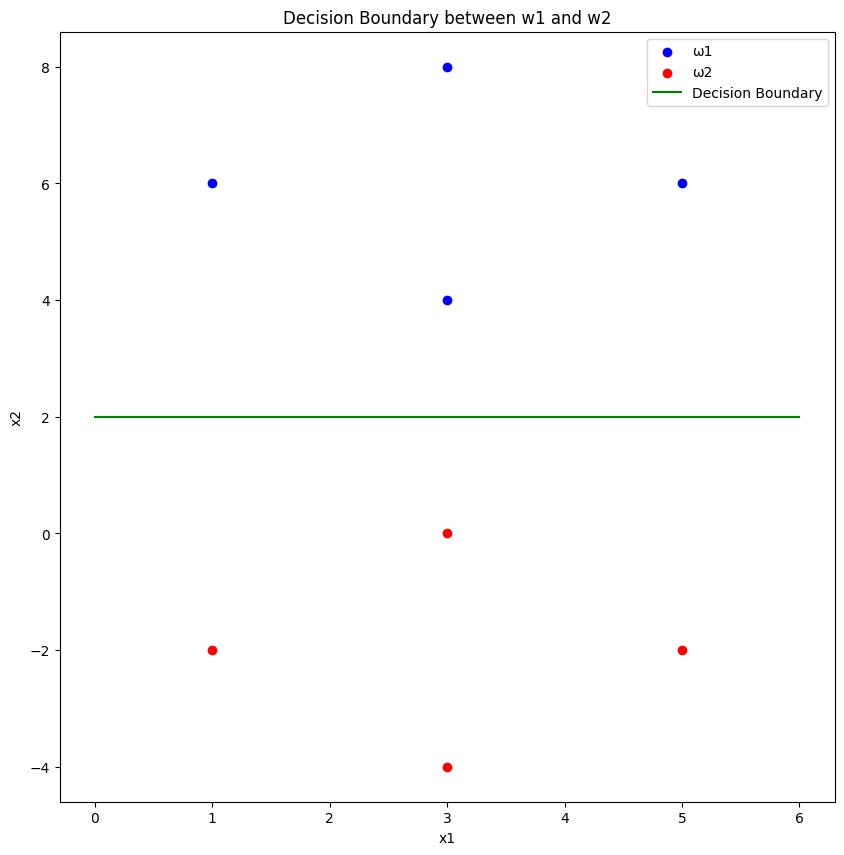

In [ ]:
# Question 1
w1_q1 = np.array([[1, 6], [3, 4], [3, 8], [5, 6]])
w2_q1 = np.array([[3, 0], [1, -2], [3, -4], [5, -2]])
pw1_q1 = 0.5
pw2_q1 = 0.5
find_boundary(w1_q1, w2_q1, pw1_q1, pw2_q1)

Find and plot the decision boundary between class ω1 and ω2. <br>Assume P(ω1) =0.3; P(ω2)=0.7<br>
```
ω1 = [1,-1; 2,-5; 3,-6; 4,-10; 5,-12; 6,-15]
ω2 = [-1,1; -2,5; -3,6; -4,10, -5,12; -6, 15]



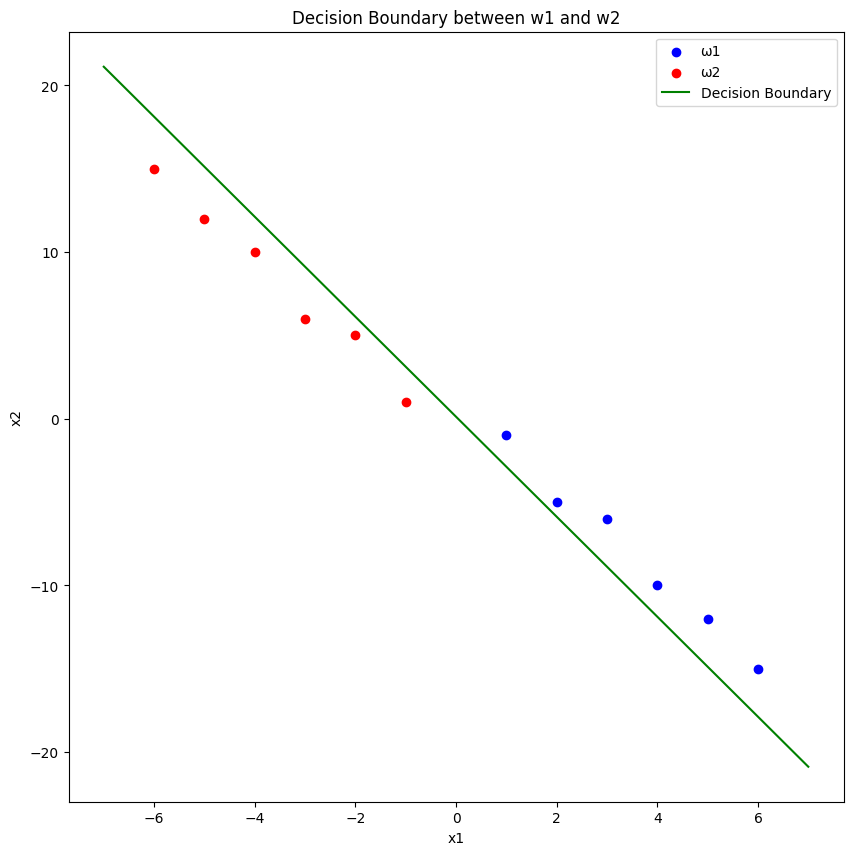

In [ ]:
# Question 2
w1_q2 = np.array([[1, -1], [2, -5], [3, -6], [4, -10], [5, -12], [6, -15]])
w2_q2 = np.array([[-1, 1], [-2, 5], [-3, 6], [-4, 10], [-5, 12], [-6, 15]])
pw1_q2 = 0.3
pw2_q2 = 0.7
find_boundary(w1_q2, w2_q2, pw1_q2, pw2_q2)


Find and plot the decision boundary between class ω1 and ω2.<br> Assume P(ω1) = P(ω2).<br>
```
ω1 = [2,6; 3,4; 3,8; 4,6]
ω2 = [3,0; 1,-2; 3,-4; 5,-2]
```

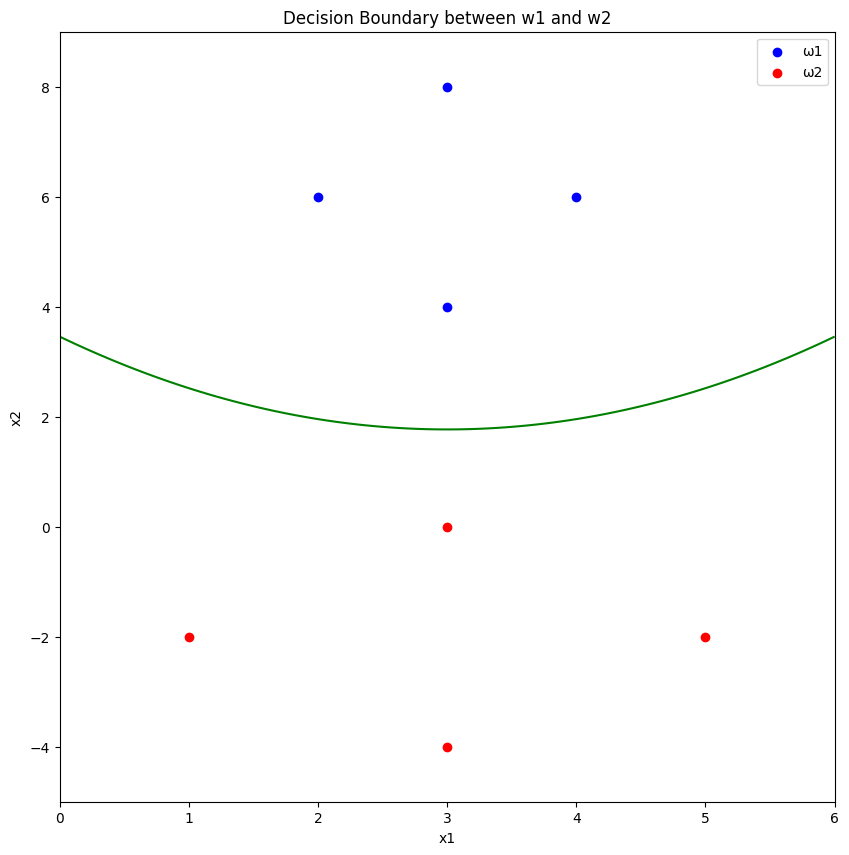

In [ ]:
# Question 3
w1_q3 = np.array([[2, 6], [3, 4], [3, 8], [4, 6]])
w2_q3 = np.array([[3, 0], [1, -2], [3, -4], [5, -2]])
pw1_q3 = 0.5
pw2_q3 = 0.5
find_boundary(w1_q3, w2_q3, pw1_q3, pw2_q3)

## Question 4
## Bayes Classifier for Iris Dataset

**Dataset Specifications:**
- Total number of samples = 150
- Number of classes = 3 (Iris setosa, Iris virginica, and Iris versicolor)
- Number of samples in each class = 50
- Number of dimensions = 4
- Feature vector = `<sepal length, sepal width, petal length, petal width>`

### Task:
1. Use only two features: `Petal Length` and `Petal Width` for 3-class classification and implement a **Bayes Classifier**.
2. Divide the dataset as follows:
   - **Training set:** First 40 samples in each class.
   - **Test set:** Remaining 10 samples in each class.
3. Draw the **decision boundary** between the three classes using these two features.
4. Visualize the decision regions corresponding to the three classes (2D, 3 regions) for a multi-class classification problem.


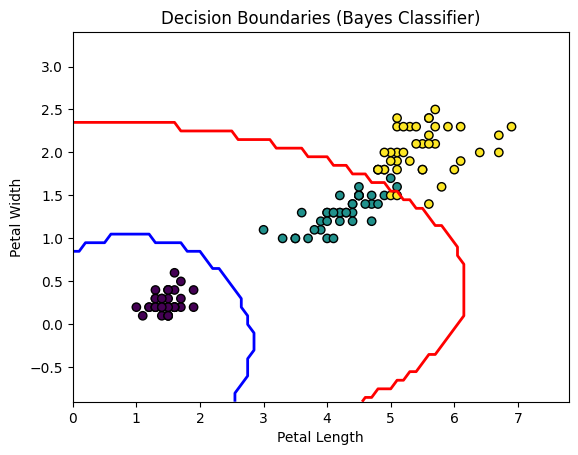

Accuracy of the Bayes Classifier: 96.66666666666667%


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to calculate mean and variance for each class
def calculate_mean_variance(training_df, labels, n):
    mean = np.zeros((n, training_df.shape[1]))
    var = np.zeros((n, training_df.shape[1]))

    for i in range(n):
        classi = training_df[labels == i]
        mean[i, :] = np.mean(classi, axis=0)
        var[i, :] = np.var(classi, axis=0)

    return mean, var

# Function to calculate Gaussian probability
def gaussian_probability(x, mean, var):
    exponent = np.exp(-((x - mean) ** 2) / (2 * var))
    return (1 / np.sqrt(2 * np.pi * var)) * exponent

# Bayes classifier
def bayes_classifier(X, mean, var, n):
    pw = 1 / n
    prob = np.zeros((X.shape[0], n))

    for i in range(n):
        likelihood = gaussian_probability(X, mean[i], var[i]).prod(axis=1)
        prob[:, i] = likelihood * pw

    return np.argmax(prob, axis=1)

# Load iris dataset
iris_df = pd.read_csv('/content/iris.csv')

# Only two features
iris_df = iris_df[['PetalLengthCm', 'PetalWidthCm', 'Species']]

# Testing data: First 10 samples of each variety
test_df = []
for class_label in iris_df['Species'].unique():
    sample = iris_df[iris_df['Species'] == class_label].head(10)
    test_df.append(sample)

test_df = pd.concat(test_df)

n = 3
# Dropping testing dataset
training_df = iris_df.drop(test_df.index)

# Mapping species to integers: 'setosa' -> 0, 'versicolor' -> 1, 'virginica' -> 2
species_map = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
labels = training_df['Species'].map(species_map).values
training_df.drop(columns=['Species'], inplace=True)

# Calculating mean and variance for training data
mean, var = calculate_mean_variance(training_df, labels, n)

# For plotting decision boundaries
x_min, x_max = training_df.iloc[:, 0].min() - 1, training_df.iloc[:, 0].max() + 1
y_min, y_max = training_df.iloc[:, 1].min() - 1, training_df.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
grid = np.c_[xx.ravel(), yy.ravel()]

# Classifying the grid points
result = bayes_classifier(grid, mean, var, n)
result = result.reshape(xx.shape)

# Plotting decision boundaries
plt.contour(xx, yy, result, levels=[0.5, 1.5], colors=['blue', 'red'], linewidths=2)
plt.scatter(training_df.iloc[:, 0], training_df.iloc[:, 1], c=labels, edgecolor='k', marker='o')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Decision Boundaries (Bayes Classifier)')
plt.show()

# Mapping the test labels to integers for comparison
test_labels = test_df['Species'].map(species_map).values

# Dropping the 'Species' column from the test data, keeping only the features
test_features = test_df.drop(columns=['Species']).values

# Classifying the test data
test_predictions = bayes_classifier(test_features, mean, var, n)

# Calculating accuracy
accuracy = np.mean(test_predictions == test_labels) * 100
print(f'Accuracy of the Bayes Classifier: {accuracy}%')

## Classifier for "face feature vectors.csv" Dataset

**Dataset Specifications:**
- Total number of samples = 800
- Number of classes = 2 (labeled as "male" and "female")
- Samples from `1 to 400` belong to class "male"
- Samples from `401 to 800` belong to class "female"
- Number of samples per class = 400
- Number of dimensions = 128 (each sample is a 128-dimensional feature vector)

### Task:
1. **Training Set:**
   - Use the first **395 samples** from each class as the training set:
     - Samples `1 to 395` for "male"
     - Samples `401 to 795` for "female"
  
2. **Test Set:**
   - Use the **last 5 samples** from each class as the test set:
     - Samples `396 to 400` for "male"
     - Samples `796 to 800` for "female"
  
3. Design and implement a **classifier** using this dataset.

4. Evaluate the classifier using the test samples.


In [1]:
import pandas as pd

pdf = pd.read_csv("/content/face_feature_vectors.csv");
pdf.head(5)


,Unnamed: 0,Unnamed: 1,0,1,2,3,4,5,6,7,...,118,119,120,121,122,123,124,125,126,127
0,1,male,-0.066420,0.151611,0.027740,0.052771,-0.066105,-0.041232,-0.002637,-0.158467,...,0.025989,-0.001087,0.027260,-0.046754,-0.118619,-0.163774,-0.000590,-0.076400,0.107497,0.001567
1,2,male,-0.030614,0.049667,0.008084,-0.050324,0.007649,-0.063818,-0.019530,-0.119905,...,0.044229,-0.023900,-0.028108,0.040618,-0.146579,-0.141244,0.016162,0.017638,0.080610,-0.015930
2,3,male,-0.096178,0.061127,0.035326,-0.035388,-0.090728,-0.018634,-0.024315,-0.139786,...,0.111141,0.059436,-0.029222,0.042115,-0.222173,-0.116908,0.093428,0.017391,0.057652,0.086116
3,4,male,-0.103057,0.085044,0.078333,-0.035873,-0.028163,0.004924,0.007829,-0.017016,...,0.100793,-0.002644,-0.023388,0.029497,-0.139830,-0.119243,0.005306,-0.015100,0.161575,0.062462
4,5,male,-0.125815,0.120046,0.023131,-0.042901,0.038215,-0.049677,-0.054258,-0.130758,...,0.090197,0.067527,0.039926,0.047469,-0.056852,-0.076700,0.004966,0.028171,0.026041,0.084135


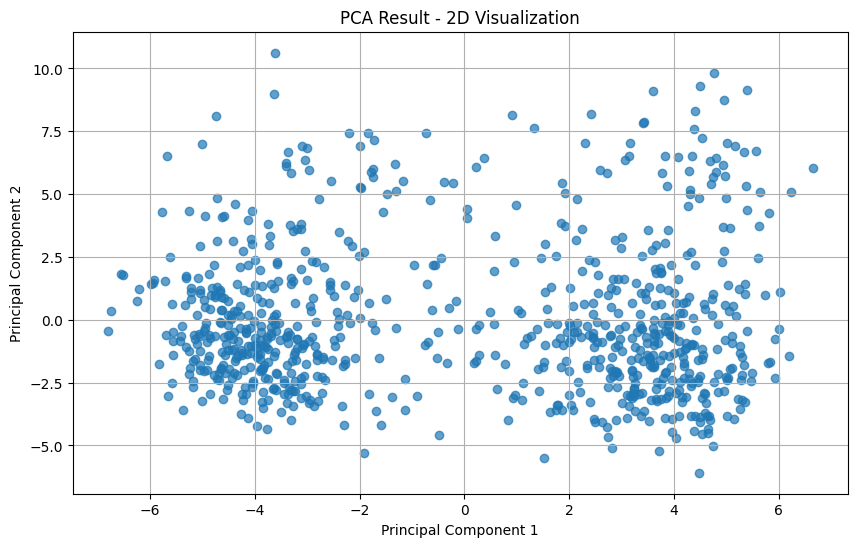

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Load the dataset
# Replace 'your_data.csv' with your actual data file
data = pd.read_csv('/content/face_feature_vectors.csv')

# Step 2: Preprocess the data
# Assuming the first few columns are non-numeric and not needed for PCA
features = data.iloc[:, 2:]  # Select only numeric columns for PCA
features = features.dropna()  # Remove missing values if any

# Step 3: Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 4: Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions
pca_result = pca.fit_transform(scaled_features)

# Step 5: Visualize the result
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.7)
plt.title('PCA Result - 2D Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()


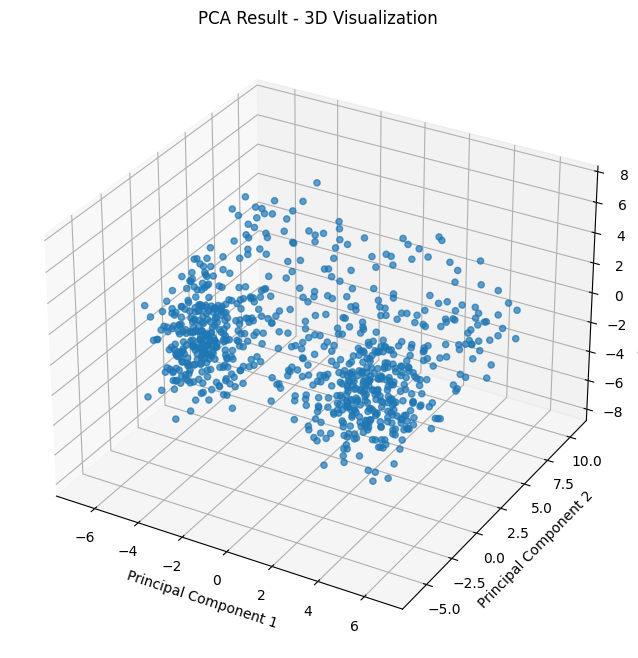

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Load the dataset
# Replace 'your_data.csv' with your actual data file
data = pd.read_csv('/content/face_feature_vectors.csv')

# Step 2: Preprocess the data
# Assuming the first few columns are non-numeric and not needed for PCA
features = data.iloc[:, 2:]  # Select only numeric columns for PCA
features = features.dropna()  # Remove missing values if any

# Step 3: Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 4: Apply PCA
pca = PCA(n_components=3)  # Reduce to 3 dimensions
pca_result = pca.fit_transform(scaled_features)

# Step 5: Visualize the result in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], alpha=0.7)

# Set labels
ax.set_title('PCA Result - 3D Visualization')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

plt.show()


In [6]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px

# Step 1: Load the dataset
# Replace 'your_data.csv' with your actual data file
data = pd.read_csv('/content/face_feature_vectors.csv')

# Step 2: Preprocess the data
# Assuming the first few columns are non-numeric and not needed for PCA
features = data.iloc[:, 2:]  # Select only numeric columns for PCA
features = features.dropna()  # Remove missing values if any

# Step 3: Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 4: Apply PCA
pca = PCA(n_components=3)  # Reduce to 3 dimensions
pca_result = pca.fit_transform(scaled_features)

# Convert the PCA result to a DataFrame for easier handling with Plotly
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])

# Step 5: Create an interactive 3D scatter plot using Plotly
fig = px.scatter_3d(pca_df, x='PC1', y='PC2', z='PC3',
                    title='PCA Result - 3D Interactive Visualization',
                    labels={'PC1': 'Principal Component 1',
                            'PC2': 'Principal Component 2',
                            'PC3': 'Principal Component 3'})

# Show the plot
fig.show()


In [7]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Load the dataset
# Replace 'your_data.csv' with your actual data file
data = pd.read_csv('/content/face_feature_vectors.csv')

# Step 2: Preprocess the data
# Assuming the first few columns are non-numeric and not needed for PCA
features = data.iloc[:, 2:]  # Select only numeric columns for PCA
features = features.dropna()  # Remove missing values if any

# Step 3: Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 4: Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)  # Reduce to 2 dimensions
pca_result = pca.fit_transform(scaled_features)

# Convert the PCA result to a DataFrame for easier handling
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Step 5: Split the dataset into w1 and w2
# Note: w1 will have rows 0 to 394 and w2 will have rows 400 to 794 due to 0-based indexing in Python.
w1 = pca_df.iloc[0:395]  # Rows 1 to 395 (0 to 394 in 0-based indexing)
w2 = pca_df.iloc[400:795]  # Rows 401 to 795 (400 to 794 in 0-based indexing)

# Display the shapes of the resulting datasets
print("Shape of w1:", w1.shape)
print("Shape of w2:", w2.shape)

# Optionally, you can save the reduced datasets to CSV files


Shape of w1: (395, 2)
Shape of w2: (395, 2)


In [12]:
w1 = np.array(w1)
w2 = np.array(w2)
print(w1)
print(w2)

[[ 4.35724390e+00  5.87760931e-02]
 [ 4.06540769e+00  1.63965643e+00]
 [ 3.94811784e+00  2.18119903e+00]
 [ 4.56065946e+00 -1.38982039e+00]
 [ 5.39921091e+00  4.37150384e+00]
 [ 4.29694212e+00  5.15167517e+00]
 [ 2.82160068e+00 -1.50193017e+00]
 [-5.66428682e-01  2.19820482e+00]
 [ 3.52365754e+00  1.29351348e+00]
 [ 3.88913495e+00 -4.51400147e-01]
 [ 3.65093955e+00  2.97316341e+00]
 [ 2.93749454e+00  1.61496984e+00]
 [ 3.78522503e+00 -2.32515647e+00]
 [ 5.22974076e+00  1.21062187e+00]
 [ 2.53276665e+00 -8.71235500e-01]
 [ 2.41623037e+00  8.16845790e+00]
 [ 1.83697963e+00  3.86415304e+00]
 [ 3.77260097e+00  5.83611109e+00]
 [ 6.02539082e+00  1.08808645e+00]
 [ 2.09221606e+00 -4.91928589e-01]
 [ 4.17762745e+00  6.59069099e-01]
 [ 2.74821220e+00 -4.67950565e+00]
 [ 4.49939543e+00 -2.21961797e+00]
 [ 4.50405199e+00 -4.05382105e+00]
 [ 4.74907946e+00 -5.03198243e+00]
 [ 4.09467978e+00 -2.80927981e+00]
 [ 3.69929043e+00 -9.06237725e-01]
 [ 5.73790993e+00  9.72700036e-01]
 [ 5.35800671e+00  1

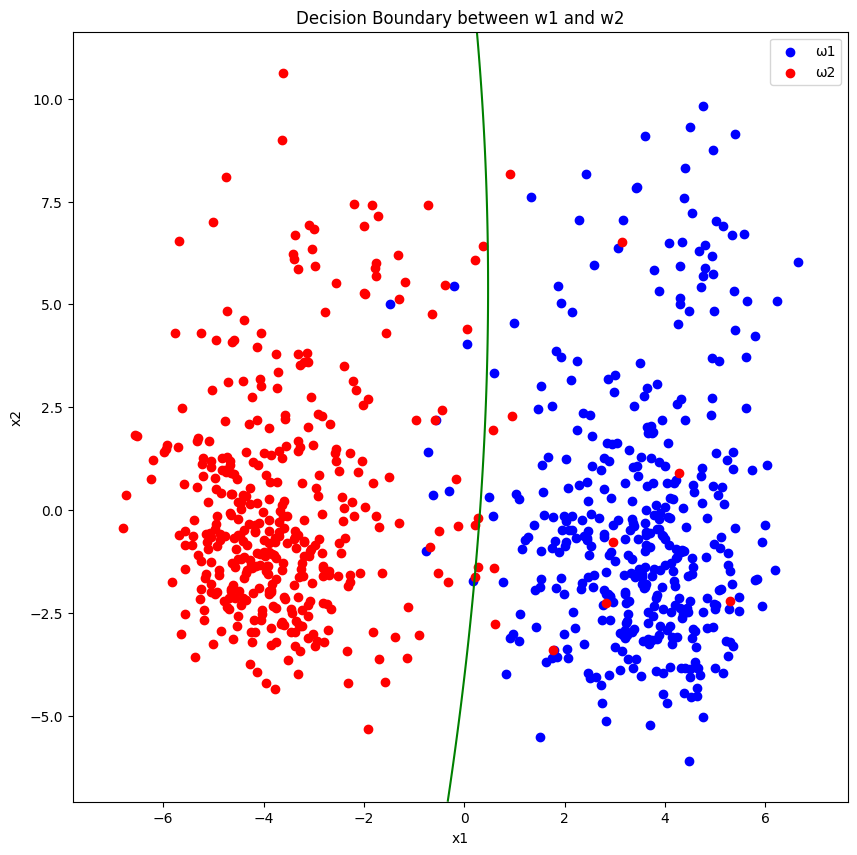

In [13]:
pw1_q1 = 0.5
pw2_q1 = 0.5
find_boundary(w1, w2, pw1_q1, pw2_q1)

Accuracy: 97.22%


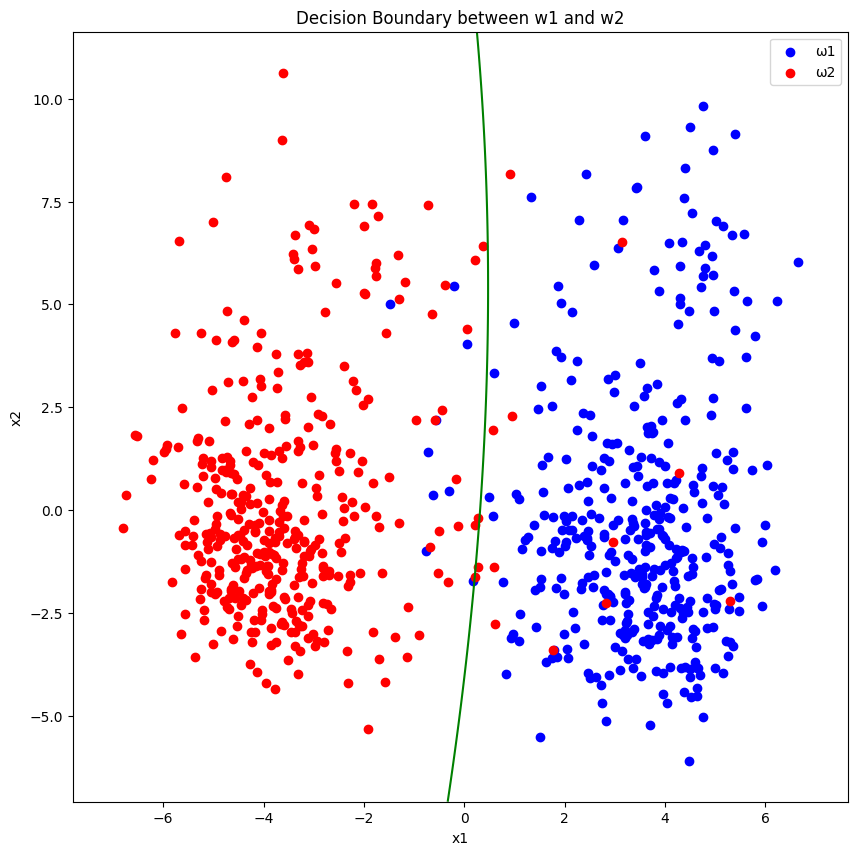

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Function to check if the covariance matrix falls under Case 1
def isCase1(mat):
    first = mat[0][0]
    for i in range(1, len(mat)):
        if mat[i][i] != first:
            return False
    return True

# Function to compute the discriminant function for Case 1
def linear_case1(w, pw, cov_mat):
    u1 = np.mean(w, axis=0)  # Compute the mean of the data points
    cov = cov_mat[0][0]  # Extract the covariance value
    weight = u1 / cov  # Compute the weight vector
    bias = np.log(pw) - 0.5 * np.dot(u1.T, u1) / (cov ** 2)  # Compute the bias term
    return weight, bias

# Function to compute the discriminant function for Case 2
def linear_case2(w, pw, cov_mat):
    u1 = np.mean(w, axis=0)  # Compute the mean of the data points
    inv_cov = np.linalg.inv(cov_mat)  # Compute the inverse of the covariance matrix
    weight = inv_cov @ u1  # Compute the weight vector
    bias = np.log(pw) - 0.5 * u1.T @ inv_cov @ u1  # Compute the bias term
    return weight, bias

# Function to compute the discriminant function for Case 3 (non-linear)
def non_linear(w, pw, cov_mat):
    u1 = np.mean(w, axis=0)  # Compute the mean of the data points
    inv_cov = np.linalg.inv(cov_mat)  # Compute the inverse of the covariance matrix
    weight1 = -0.5 * inv_cov  # Compute the quadratic term weight matrix
    weight2 = inv_cov @ u1  # Compute the linear term weight vector
    bias = np.log(pw) - 0.5 * np.log(np.linalg.det(cov_mat)) - 0.5 * u1.T @ inv_cov @ u1  # Compute the bias term
    return weight1, weight2, bias

# Function to classify the data points using Bayes classifier and determine the decision boundary
def bayes_classifier(w1, w2, pw1, pw2):
    w1_cov = np.cov(w1, rowvar=False)  # Compute the covariance matrix for class ω1
    w2_cov = np.cov(w2, rowvar=False)  # Compute the covariance matrix for class ω2

    # Check if the covariance matrices are equal (Case 2)
    if np.allclose(w1_cov, w2_cov):
        weight1, bias1 = linear_case2(w1, pw1, w1_cov)
        weight2, bias2 = linear_case2(w2, pw2, w2_cov)
        w = weight1 - weight2  # Compute the weight difference
        b = bias1 - bias2  # Compute the bias difference
        x_min = min(np.min(w1[:, 0]), np.min(w2[:, 0])) - 1  # Determine the minimum x value for plotting
        x_max = max(np.max(w1[:, 0]), np.max(w2[:, 0])) + 1  # Determine the maximum x value for plotting
        x_values = np.linspace(x_min, x_max, 100)  # Generate x values for plotting
        y_values = -(w[0] * x_values + b) / w[1]  # Compute the corresponding y values for the decision boundary
        return x_values, y_values, weight1, bias1, weight2, bias2

    # Check if the covariance matrices fall under Case 1
    elif isCase1(w1_cov) and isCase1(w2_cov):
        weight1, bias1 = linear_case1(w1, pw1, w1_cov)
        weight2, bias2 = linear_case1(w2, pw2, w2_cov)
        w = weight1 - weight2  # Compute the weight difference
        b = bias1 - bias2  # Compute the bias difference
        x_min = min(np.min(w1[:, 0]), np.min(w2[:, 0])) - 1  # Determine the minimum x value for plotting
        x_max = max(np.max(w1[:, 0]), np.max(w2[:, 0])) + 1  # Determine the maximum x value for plotting
        x_values = np.linspace(x_min, x_max, 100)  # Generate x values for plotting
        y_values = -(w[0] * x_values + b) / w[1]  # Compute the corresponding y values for the decision boundary
        return x_values, y_values, weight1, bias1, weight2, bias2

    # If the covariance matrices fall under Case 3 (non-linear)
    else:
        weight1_1, weight1_2, bias1 = non_linear(w1, pw1, w1_cov)
        weight2_1, weight2_2, bias2 = non_linear(w2, pw2, w2_cov)
        x_min, x_max = min(np.min(w1[:, 0]), np.min(w2[:, 0])) - 1, max(np.max(w1[:, 0]), np.max(w2[:, 0])) + 1  # Determine the x range for plotting
        y_min, y_max = min(np.min(w1[:, 1]), np.min(w2[:, 1])) - 1, max(np.max(w1[:, 1]), np.max(w2[:, 1])) + 1  # Determine the y range for plotting
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))  # Create a meshgrid for plotting
        grid_points = np.c_[xx.ravel(), yy.ravel()]  # Flatten the meshgrid points
        g1_values = np.array([point.T @ weight1_1 @ point + weight1_2.T @ point + bias1 for point in grid_points])  # Compute the discriminant function values for class ω1
        g2_values = np.array([point.T @ weight2_1 @ point + weight2_2.T @ point + bias2 for point in grid_points])  # Compute the discriminant function values for class ω2
        g1_values = g1_values.reshape(xx.shape)  # Reshape the discriminant function values to match the meshgrid
        g2_values = g2_values.reshape(xx.shape)  # Reshape the discriminant function values to match the meshgrid
        return xx, yy, g1_values, g2_values, weight1_1, weight1_2, bias1, weight2_1, weight2_2, bias2

# Function to plot the decision boundary between two classes
def find_boundary(w1, w2, pw1, pw2):
    plt.figure(figsize=(10, 10))
    plt.scatter(w1[:, 0], w1[:, 1], color='blue', label='ω1')  # Plot the data points for class ω1
    plt.scatter(w2[:, 0], w2[:, 1], color='red', label='ω2')  # Plot the data points for class ω2
    result = bayes_classifier(w1, w2, pw1, pw2)  # Get the decision boundary result from the Bayes classifier
    if isinstance(result, tuple) and len(result) == 6:
        x_values, y_values, weight1, bias1, weight2, bias2 = result
        plt.plot(x_values, y_values, color='green', label='Decision Boundary')  # Plot the decision boundary for linear cases
    else:
        xx, yy, g1_values, g2_values, weight1_1, weight1_2, bias1, weight2_1, weight2_2, bias2 = result
        plt.contour(xx, yy, g1_values - g2_values, levels=[0], colors='green')  # Plot the decision boundary for non-linear case

    # Calculate accuracy
    correct = 0
    total = len(w1) + len(w2)
    for point in w1:
        if isinstance(result, tuple) and len(result) == 6:
            g1 = weight1 @ point + bias1
            g2 = weight2 @ point + bias2
        else:
            g1 = point.T @ weight1_1 @ point + weight1_2.T @ point + bias1
            g2 = point.T @ weight2_1 @ point + weight2_2.T @ point + bias2
        if g1 > g2:
            correct += 1
    for point in w2:
        if isinstance(result, tuple) and len(result) == 6:
            g1 = weight1 @ point + bias1
            g2 = weight2 @ point + bias2
        else:
            g1 = point.T @ weight1_1 @ point + weight1_2.T @ point + bias1
            g2 = point.T @ weight2_1 @ point + weight2_2.T @ point + bias2
        if g2 > g1:
            correct += 1
    accuracy = correct / total
    print(f"Accuracy: {accuracy * 100:.2f}%")

    plt.title("Decision Boundary between w1 and w2")
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.show()

pw1_q1 = 0.5
pw2_q1 = 0.5
find_boundary(w1, w2, pw1_q1, pw2_q1)